In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [20]:
true_data = pd.read_csv('./../../processed_VideoCommentsThreatCorpus.csv')

# pred_data_mistral = pd.read_csv('no_context_mistral_2025-05-02_22-12.csv')
pred_data_mistral_nemo = pd.read_csv('no_context_mistral-nemo_2025-05-01_23-39.csv')
pred_data_mistral_small = pd.read_csv('no_context_mistral-small_final.csv')
pred_data_qwen_14 = pd.read_csv('no_context_qwen14b-final.csv')
pred_data_gemma = pd.read_csv('no_context_gemma312b-final.csv')


In [21]:
def batch_eval(true_df: pd.DataFrame, pred_df: pd.DataFrame):
    # Map predicted labels: 0/1 → 0, 2 → 1, else → -1 (failed classification)
    pred_df['violence_label'] = pred_df['violence_label'].apply(lambda x: 0 if x in [0, 1] else 1 if x == 2 else -1)

    # Merge datasets
    merged_df = true_df.merge(pred_df, left_on='id', right_on='document_id', suffixes=('_true', '_pred'))

    # Convert flags to int
    merged_df['flags'] = merged_df['flags'].astype(str).str.extract(r'(\d+)').astype(int)

    # Count failures and successes
    total_predictions = len(merged_df)
    failed_predictions = (merged_df['violence_label'] == -1).sum()
    successful_predictions = total_predictions - failed_predictions

    print(f'Total predictions: {total_predictions}')
    print(f'Failed classifications: {failed_predictions} ({failed_predictions / total_predictions:.2%})')
    print(f'Successful classifications: {successful_predictions} ({successful_predictions / total_predictions:.2%})\n')

    # Filter out failed classifications (-1) before evaluation
    merged_df = merged_df[merged_df['violence_label'] != -1]

    # Extract labels
    y_true = merged_df['flags']
    y_pred = merged_df['violence_label']

    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    report = classification_report(y_true, y_pred, labels=[0, 1])

    # Print results
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('\nConfusion Matrix:\n', cm)
    print('\nClassification Report:\n', report)

    # Visualization of Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Violent', 'Violent'], yticklabels=['Non-Violent', 'Violent'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix [Neighbors]')
    plt.show()

    # Plot distribution of true and predicted labels
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.countplot(x=y_true, ax=ax[0])
    ax[0].set_title('True Label Distribution')
    ax[0].set_xticklabels(['Non-Violent', 'Violent'])

    sns.countplot(x=y_pred, ax=ax[1])
    ax[1].set_title('Predicted Label Distribution')
    ax[1].set_xticklabels(['Non-Violent', 'Violent'])

    plt.show()

Mistral-Nemo
Total predictions: 9630
Failed classifications: 6918 (71.84%)
Successful classifications: 2712 (28.16%)

Accuracy: 0.8562
Precision: 0.9129
Recall: 0.8562
F1 Score: 0.8740

Confusion Matrix:
 [[2054  339]
 [  51  268]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.91      2393
           1       0.44      0.84      0.58       319

    accuracy                           0.86      2712
   macro avg       0.71      0.85      0.75      2712
weighted avg       0.91      0.86      0.87      2712



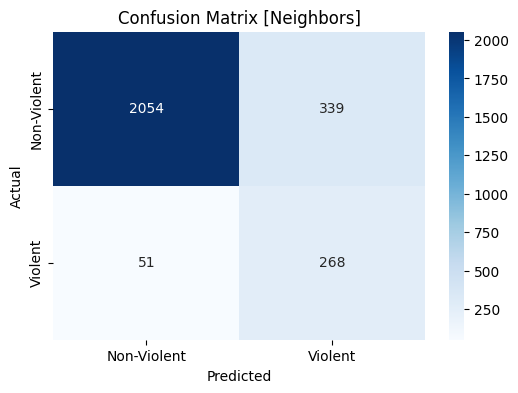

C:\Users\Elias\AppData\Local\Temp\ipykernel_18644\3188133180.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
C:\Users\Elias\AppData\Local\Temp\ipykernel_18644\3188133180.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


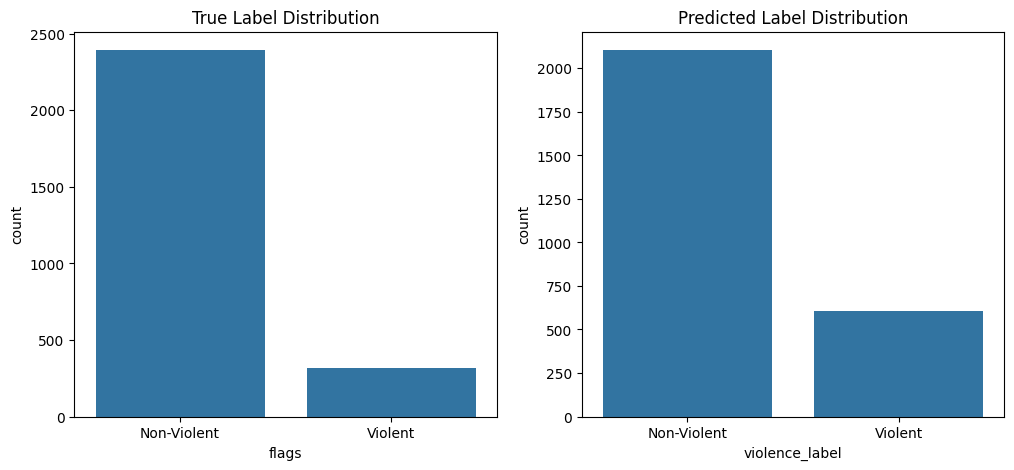

Mistral-Small
Total predictions: 9630
Failed classifications: 0 (0.00%)
Successful classifications: 9630 (100.00%)

Accuracy: 0.9117
Precision: 0.9080
Recall: 0.9117
F1 Score: 0.9095

Confusion Matrix:
 [[8015  355]
 [ 495  765]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      8370
           1       0.68      0.61      0.64      1260

    accuracy                           0.91      9630
   macro avg       0.81      0.78      0.80      9630
weighted avg       0.91      0.91      0.91      9630



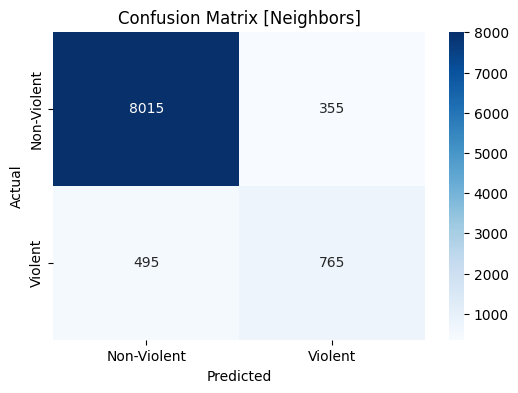

C:\Users\Elias\AppData\Local\Temp\ipykernel_18644\3188133180.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
C:\Users\Elias\AppData\Local\Temp\ipykernel_18644\3188133180.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


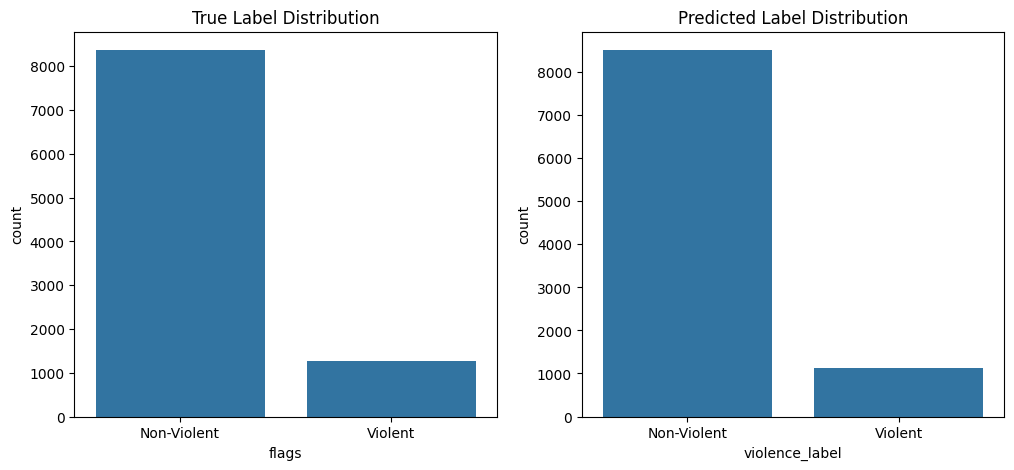

Qwen-14
Total predictions: 9630
Failed classifications: 0 (0.00%)
Successful classifications: 9630 (100.00%)

Accuracy: 0.8783
Precision: 0.9138
Recall: 0.8783
F1 Score: 0.8895

Confusion Matrix:
 [[7405  965]
 [ 207 1053]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.93      8370
           1       0.52      0.84      0.64      1260

    accuracy                           0.88      9630
   macro avg       0.75      0.86      0.78      9630
weighted avg       0.91      0.88      0.89      9630



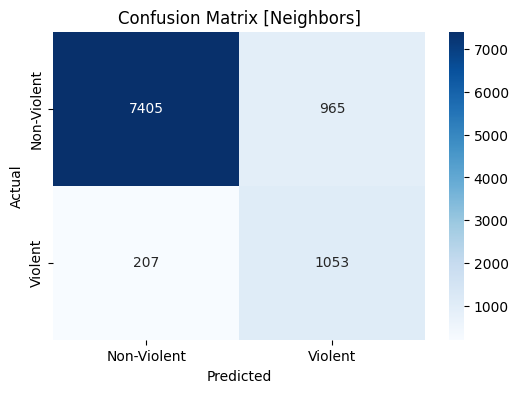

C:\Users\Elias\AppData\Local\Temp\ipykernel_18644\3188133180.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
C:\Users\Elias\AppData\Local\Temp\ipykernel_18644\3188133180.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


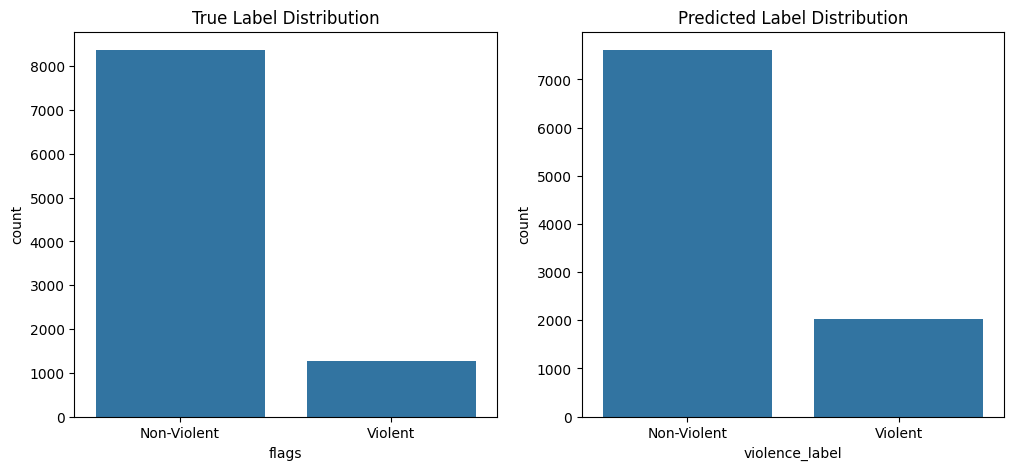

Gemma
Total predictions: 9630
Failed classifications: 4 (0.04%)
Successful classifications: 9626 (99.96%)

Accuracy: 0.8469
Precision: 0.9012
Recall: 0.8469
F1 Score: 0.8639

Confusion Matrix:
 [[7122 1244]
 [ 230 1030]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.85      0.91      8366
           1       0.45      0.82      0.58      1260

    accuracy                           0.85      9626
   macro avg       0.71      0.83      0.74      9626
weighted avg       0.90      0.85      0.86      9626



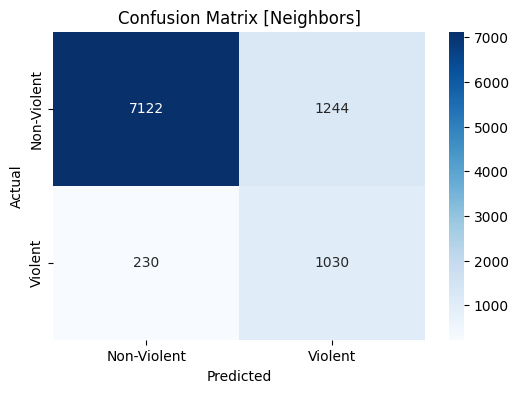

C:\Users\Elias\AppData\Local\Temp\ipykernel_18644\3188133180.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['Non-Violent', 'Violent'])
C:\Users\Elias\AppData\Local\Temp\ipykernel_18644\3188133180.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Non-Violent', 'Violent'])


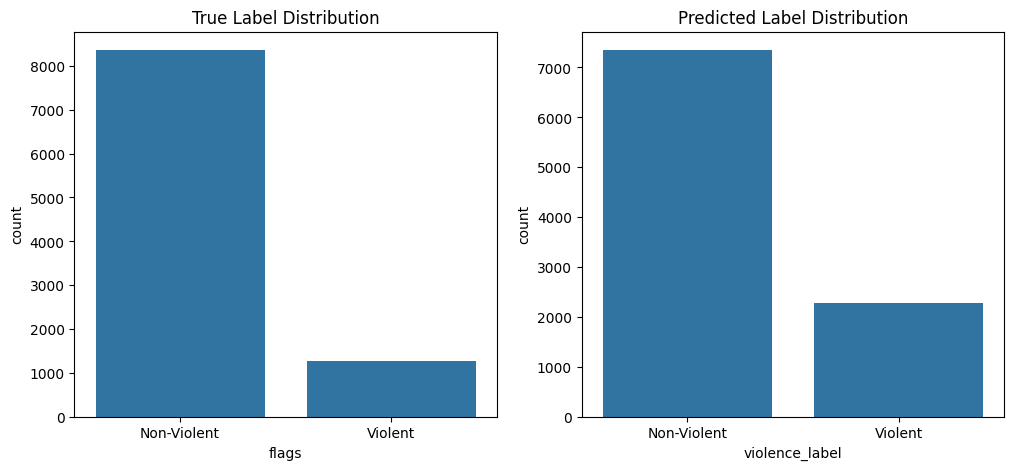

In [22]:
# print("Mistral")
# batch_eval(true_data, pred_data_mistral)
print("Mistral-Nemo")
batch_eval(true_data, pred_data_mistral_nemo)
print("Mistral-Small")
batch_eval(true_data, pred_data_mistral_small)
print("Qwen-14")
batch_eval(true_data, pred_data_qwen_14)
print("Gemma")
batch_eval(true_data, pred_data_gemma)

In [23]:
pred_data_div = [pred_data_mistral, pred_data_mistral_nemo, pred_data_mistral_small]

for pred_data in pred_data_div:
    
    # Ensure flagged_issues is interpreted as lists
    # pred_data["flagged_issues"] = pred_data["flagged_issues"].apply(eval)

    # Flatten the flagged issues into a single list
    all_flags = [item for sublist in pred_data["flagged_issues"] for item in sublist]

    all_flags = [item.strip("[]'\" ") for item in all_flags if item.strip("[]'\" ") not in ["", "[", "]"]]

    # Count occurrences of each flag
    flag_counts = pd.Series(all_flags).value_counts()
  
    if not flag_counts.empty:
        plt.figure(figsize=(8, 5))
        flag_counts.plot(kind="bar", color="skyblue", edgecolor="black")
        plt.title("Distribution of Flagged Issues")
        plt.xlabel("Flagged Issue")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
    else:
        print("No flagged issues to plot.")

NameError: name 'pred_data_mistral' is not defined